<a href="https://colab.research.google.com/github/KhushbooNijhawan/Agent-AI/blob/main/1_simple_chatbot_using_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chatbots With Langgraph

In [24]:
!pip install langgraph langsmith

In [25]:
!pip install langchain langchain_groq langchain_community

In [26]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(langsmith)

#using the api keys to access groq multiple LLM models and LangSmith
#langSmith is to track everything going on in bot


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


In [27]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
#tracking kept true
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"
#setup LangChain project

In [28]:
from langchain_groq import ChatGroq
#we need to use ChatGroq Opensource Models

In [29]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm
#can use any model_name present in Groq bot

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79f0d130f090>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x79f0d14b0610>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [30]:
from typing import Annotated
from typing_extensions import TypedDict
#stateGraph helps to keep track of state mgmt
from langgraph.graph import StateGraph,START,END
#StateGraph keeps on changing based on some parameters so adding messages
from langgraph.graph.message import add_messages
#when user is giving query llm model is giving response,
#the msg will getting added in langgraph.graph.message  and state in stategraph will change

In [31]:
class State(TypedDict):
  #This class State is inheriting TypeDict from above
  # Messagesvariable have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)
#on every add in messages the State will change
#Starting will build the graph and based on the class State keeps track of msgs


In [32]:
graph_builder

In [33]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}
  #this chatbot is inheriting State Class
#whenever we create a node, it needs to take the parameter 'State'
#based on these State messages the state mgmt will keep on changing
#every mesage we get as input stored in state['messages'] and response stored in
#"messages":

In [34]:
graph_builder.add_node("chatbot",chatbot)
#the chatbot needs to be added to the graph builder
# "chatbot" is the node name

In [35]:
graph_builder

In [36]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
#connect chatbot to start and end node
#state change is happening due to the State class we ad inherited

In [37]:
graph=graph_builder.compile()
#graph is ready

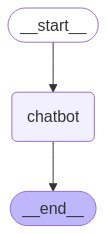

In [38]:
#displaying graph
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

Start , At chatbot node the interaction happens based on responses the state changes and it ends

In [39]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
#letting user give input, if user input is q or quit it will break and
#go to graph.stream and give all the msgs till now
#the event.value will have user msg - value['messages'] and llm msg -"Assistant:",value["messages"].content
  for event in graph.stream({'messages':("user",user_input)}):
    #giving 'user' as input
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)
      #Assistant is the llm

User: hi
dict_values([{'messages': AIMessage(content='Hi there! 👋  What can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.030909091, 'prompt_time': 0.001904477, 'queue_time': 0.014936651, 'total_time': 0.032813568}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-aa28d0c9-e6fb-4abd-9108-9d423328dff5-0', usage_metadata={'input_tokens': 11, 'output_tokens': 17, 'total_tokens': 28})}])
content='Hi there! 👋  What can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.030909091, 'prompt_time': 0.001904477, 'queue_time': 0.014936651, 'total_time': 0.032813568}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-aa28